In [2]:
import numpy # numbers
import scipy.special # logit function
import matplotlib.pyplot # plotting
%matplotlib inline

In [3]:
# neural network class definition
class NeuralNetwork:
    
    # initialization of NN
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # initialize all variables for the NN
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        self.lr = learningrate
        
        # activation function (expit is the logistic function)
        self.activation_function = lambda x: scipy.special.expit(x)
        
        # random initialization of weights from input to hidden layer &
        # from hidden to output layer
        # TODO: check additional implementation p.133, p.142 with normal distrubution
        self.wih = (numpy.random.rand(self.hnodes,self.inodes) - 0.5)
        self.who = (numpy.random.rand(self.onodes,self.hnodes) - 0.5)
        pass
    
    # train NN
    def train(self, input_list, target_lists):
        
        # ---------------   STEP 1 ----------------------------
        # inputs into a 2d array
        inputs = numpy.array(input_list, ndmin=2).T
        targets = numpy.array(target_lists, ndmin=2).T
        
        # ------ Input 2 Hidden Layer -------------------------
        # calculate signals from input to hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # ------ Hidden Layer 2 Output ------------------------
        # calculate signals from input to hidden layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate signals emerging from hidden layer
        final_outputs = self.activation_function(final_inputs)
        
        # ---------------   STEP 2 ----------------------------
        # ---------------   Back Propagation ------------------
        
        # -- calculate errors
        output_errors = targets - final_outputs
        
        # -- hidden layer errors
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        # update weights between hidden and output layers
        # DeltaWjk (page 140)
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)),
                                       numpy.transpose(hidden_outputs))
        
        # update weights between hidden and input layers
        # DeltaWjk (page 141)
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)),
                                       numpy.transpose(inputs))
        
        pass
    
    # query the NN
    def query(self, input_list):
        # inputs into a 2d array
        inputs = numpy.array(input_list, ndmin=2).T
        
        # ------ Input 2 Hidden Layer -------------------------
        # calculate signals from input to hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # ------ Hidden Layer 2 Output ------------------------
        # calculate signals from input to hidden layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate signals emerging from hidden layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
        
        pass
    

In [4]:
# neural network setup
input_nodes = 784 # 28 x 28 bits
hidden_nodes = 100 # training rows
output_nodes = 10 # number of classes
learning_rate = 0.3

# create instance of NN class
n = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)


In [5]:
# read training set 
training_data_file = open("mnist_dataset/mnist_train_100.csv")
training_data_list = training_data_file.readlines()
training_data_file.close()

len(training_data_list)

100

In [6]:
# reshape first image entry into a 28x28 image
all_values = data_list[0].split(',')
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation = 'None')

NameError: name 'data_list' is not defined

In [ ]:
# training set - re-scale data between 0.01 and 1.0
scaled_input = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
# print(scaled_input)

In [ ]:
# define 10 output nodes
onodes = 10
targets = numpy.zeros(onodes) + 0.01
targets[int(all_values[0])] = 0.99


In [7]:
# train neural network
# go through each item
for record in training_data_list:
    # create array
    all_values = record.split(',')
    # scale inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # create target values
    targets = numpy.zeros(output_nodes) + 0.01
    # define target values 
    targets[int(all_values[0])] = 0.99
    # TRAIN IMAGE
    n.train(inputs, targets)
    pass

In [8]:
# -------------- TESTING THE NEURAL NETWORK -------------- 
# Single Value Test

In [9]:
# load test data
test_data_file = open("mnist_dataset/mnist_test_10.csv")
test_data_list = test_data_file.readlines()
test_data_file.close()

In [10]:
# lets check the first image... its a 7!
all_values = test_data_list[0].split(',')
print(all_values[0])

7


In [11]:
# query neural network
n.query((numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)
# shows 0.82422579 for position 7!

array([[ 0.02302404],
       [ 0.0138464 ],
       [ 0.08750899],
       [ 0.06473203],
       [ 0.0784531 ],
       [ 0.01127306],
       [ 0.05264527],
       [ 0.58539767],
       [ 0.04873534],
       [ 0.07589354]])

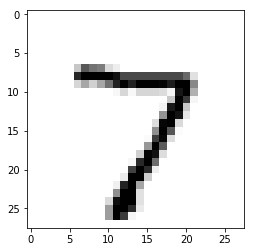

In [12]:
all_values = test_data_list[0].split(',')
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation = 'None')

In [14]:
# -------------- TESTING THE NEURAL NETWORK -------------- 
# Network Performance on Test Set (performance)

# scorecard
scorecard = []

# loop over all test set
for record in test_data_list:
    # create array
    all_values = record.split(',')
    # get correct label
    correct_label = int(all_values[0])
    print(correct_label, "correct label")
    # scale and shift values\
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query network
    outputs = n.query(inputs)
    # get highest label
    label = numpy.argmax(outputs)
    print("networks answer", label)
    # test condition
    if(label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        
    pass

7 correct label
networks answer 7
2 correct label
networks answer 6
1 correct label
networks answer 1
0 correct label
networks answer 0
4 correct label
networks answer 4
1 correct label
networks answer 1
4 correct label
networks answer 4
9 correct label
networks answer 4
5 correct label
networks answer 4
9 correct label
networks answer 4


In [16]:
# calculate performance
scorecard_array = numpy.asarray(scorecard)
print("Performance = ", scorecard_array.sum() / scorecard_array.size)

Performance =  0.6
